In [1]:
import numpy as np
import pandas as pd
import gizmo_analysis as gizmo
from astropy.io.ascii import read
import matplotlib.pyplot as plt
import halo_analysis as halo
import utilities as ut

from astropy.cosmology import Planck13, z_at_value
import astropy.units as u

In [2]:
sim = '../../../data/latte_metaldiff/m12m_res7100'
snapshot = 600
snap_times = sim + '/snapshot_times.txt'
snapshot_data = read(snap_times, format = 'commented_header', header_start = 2)
cosmo = ut.cosmology.CosmologyClass(source='agora')

In [3]:
hal = halo.io.IO.read_catalogs('redshift', 0, sim)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12m_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in halo_analysis.halo_io.IO():
* read 81298 halos from:  data/latte_metaldiff/m12m_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 81298 halos, 123 have star particles, from:  data/latte_metaldiff/m12m_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished



In [4]:
selection_radius = 5*hal['star.radius.50'][hal['host.index'][0]]

In [5]:
part = gizmo.io.Read.read_snapshots(['star'], 'snapshot', snapshot, sim)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12m_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/latte_metaldiff/m12m_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116752958 particles
    star      (id = 4): 25344979 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5
    snapshot_600.4.hdf5
    snapshot_600.5.hdf5
    snapshot_600.6.hdf5
    snapshot_600.7.hdf5

* reading cosmological parameters from:  data/latte_metaldiff/m12m_res7100/initial_condition/ic_agora_m12m.conf

* checking sanity of particle properties
! warning: star mass [min, med, max] = [3052.

In [6]:
mask = part['star'].prop('host.distance.total') <= selection_radius

In [7]:
def obtain_SFR(ages, SFTs, imass, time_at_snap, DT = 1/1000):
    time_edges = np.arange(time_at_snap, 0, -DT)[::-1]
    SFRs, time_edges = np.histogram(SFTs, weights=imass/(DT*1e9), bins=time_edges)
    return SFRs, time_edges

In [8]:
sfr, edges = obtain_SFR(
    part['star'].prop('age')[mask],
    part['star'].prop('form.time')[mask],
    part['star'].prop('form.mass')[mask],
    snapshot_data[np.where(snapshot_data['i'] == snapshot)[0][0]]['time[Gyr]']
                       )


# in gizmo_analysis.gizmo_star.MassLoss():
* generating 2-D spline to compute stellar mass loss from age + metallicity
  number of age bins = 20
  number of metallicity bins = 25


In [9]:
zs = cosmo.convert_time('redshift', 'time', edges[20:])

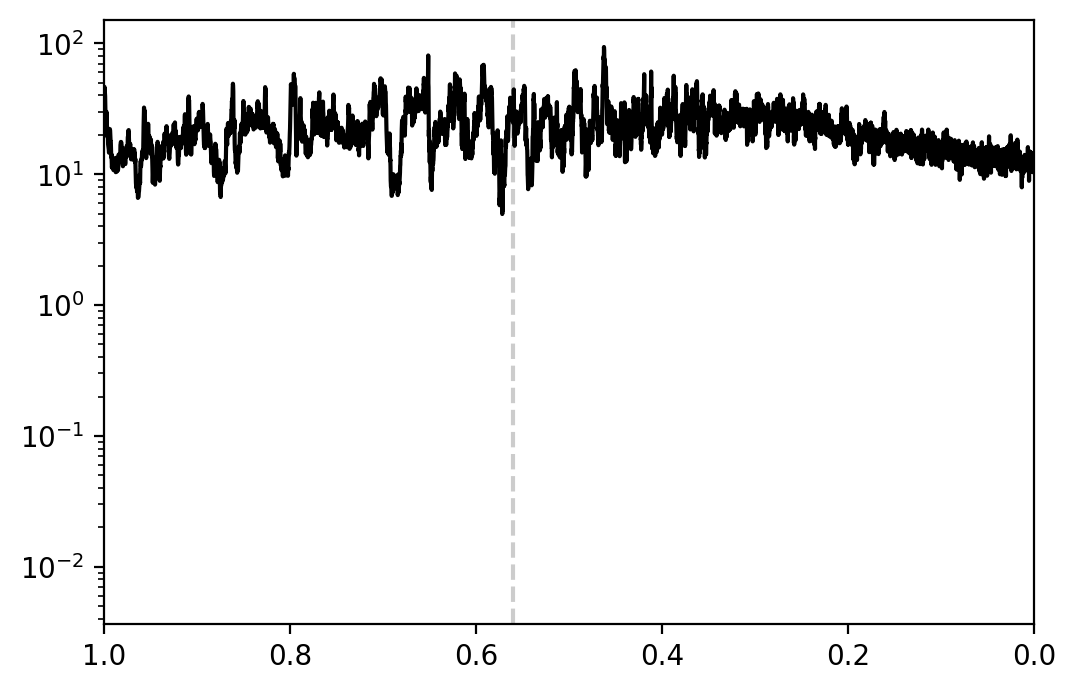

In [10]:
fig, ax = plt.subplots(dpi=200)
ax.plot(zs[:-1], sfr[20:], c='k')
ax.set_yscale('log')
ax.axvline(0.56, ls='--', c='k', alpha=.2)
ax.set_xlim(1, 0)
plt.show()